## CS/INFO 5304 Assignment 2: Data Preparation <br />


In [14]:
import pandas as pd
import pickle

with open('Extrasensory_individual_data.p', 'rb') as f:
    individual_data = pickle.load(f)

with open('Extrasensory_sensor_data.p', 'rb') as f:
    sensor_data = pickle.load(f)

In [15]:
# print(individual_data)
print(individual_data.keys())

# print(sensor_data)

Index(['uuid', 'age', 'gender', 'system', 'hours_in_study',
       'perceived_average_screen_time', 'actual_average_screen_time'],
      dtype='object')


### Case 1: Actual screen time


In [22]:
## Case 1 Problem A code (and optional graph)
import matplotlib.pyplot as plt

screen_times = individual_data['actual_average_screen_time']

# print(screen_times)

for screen_time in screen_times:
  if screen_time < 0:
    print(screen_time)

print("NA", (screen_times == -1).sum())
print('Not NA', ((screen_times > 0).sum()))





-1.0
-1.0
-1.0
-1.0
NA 4
Not NA 56


#### Writeup Answer to Problem A:
How are missing values represented for this feature?

**Missing values are representate as -1.00 for daily screen time**


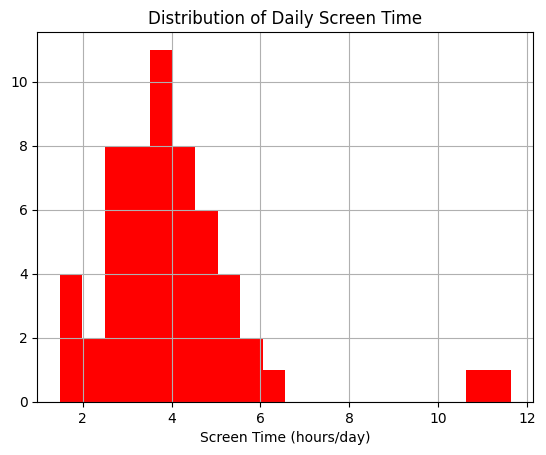

Number of outliers:
2
Outliers:
15    10.78
44    11.63
Name: actual_average_screen_time, dtype: float64
Skewness:
2.4639261915800215


In [23]:
## Case 1 Problem B code and graph
no_na_screen_times = screen_times[(screen_times != -1) & (~screen_times.isna())].astype(float)
no_na_screen_times.hist(bins=20, color='red')
plt.xlabel("Screen Time (hours/day)")
plt.title("Distribution of Daily Screen Time")
plt.show()

import numpy as np

q1 = no_na_screen_times.quantile(0.25)
q3 = no_na_screen_times.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identify outliers
outliers = no_na_screen_times[(no_na_screen_times < lower) | (no_na_screen_times > upper)]
print("Number of outliers:")
print(len(outliers))
print("Outliers:")
print(outliers)

skewness = no_na_screen_times.skew()
print(f"Skewness:")
print(skewness)

#### Writeup Answer to Problem B:
Does it have outliers?If so, how many?
Is it skewed? If so, is it left skewed or right skewed? What’s the skewness?

**There are two outliers (10.78 and 11.63), and these are both well above average daily screen time.**

**It is right-skewed with a skewness of *2.46*.**



<ipython-input-24-39ddbcd89953>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_screen_time = screen_times_na.fillna(screen_times_na.mean())
<ipython-input-24-39ddbcd89953>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  median_screen_time = screen_times_na.fillna(screen_times_na.median())
<ipython-input-24-39ddbcd89953>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('

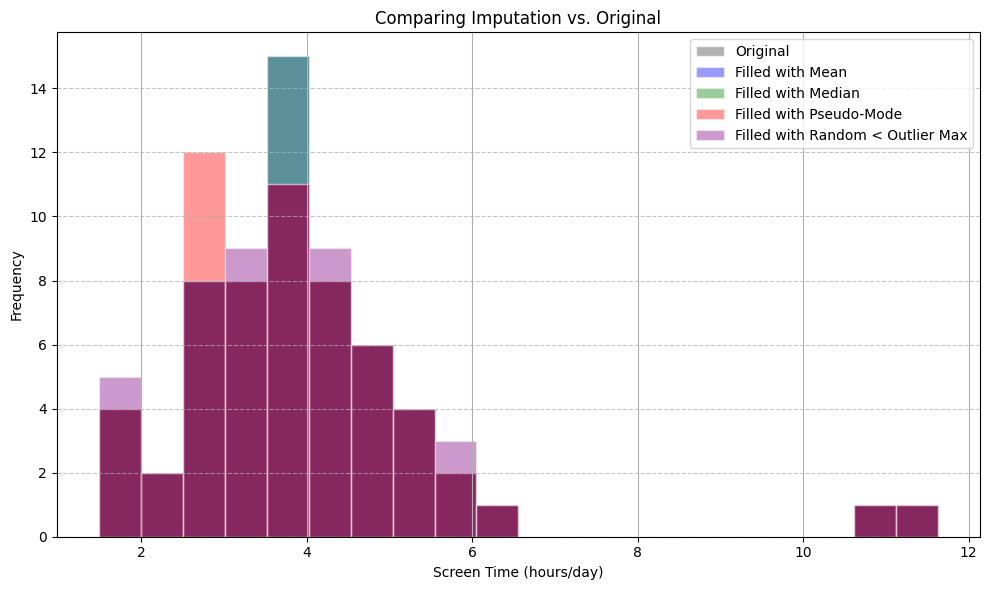

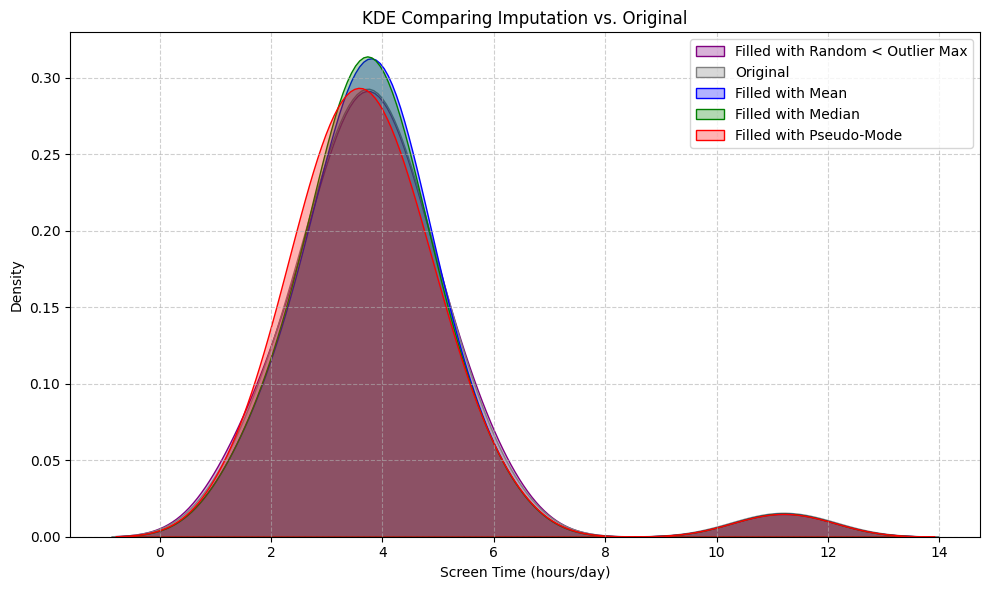

In [24]:
## Case 1 Problem C code and graph
import numpy as np
screen_times_na = screen_times.replace(-1.00, pd.NA)

mean_screen_time = screen_times_na.fillna(screen_times_na.mean())
median_screen_time = screen_times_na.fillna(screen_times_na.median())

rand_no_outlier = no_na_screen_times[no_na_screen_times <= upper]

rand = screen_times_na.copy()
missing = screen_times_na[screen_times_na.isna()].index

# Randomly choose values from valid_pool to fill
random_choices = np.random.choice(rand_no_outlier, size=len(missing), replace=True)

# Fill the missing indices
rand.loc[missing] = random_choices

rounded= screen_times_na.dropna().round(1)
pseudo_mode = rounded.mode().iloc[0]
pseudo_mode_screen_time = screen_times_na.fillna(pseudo_mode)



plt.figure(figsize=(10, 6))
screen_times_na.dropna().astype(float).hist(
    bins=20, alpha=0.6, label='Original', color='gray', edgecolor='white'
)
mean_screen_time.astype(float).hist(
    bins=20, alpha=0.4, label='Filled with Mean', color='blue', edgecolor='white'
)
median_screen_time.astype(float).hist(
    bins=20, alpha=0.4, label='Filled with Median', color='green', edgecolor='white'
)
pseudo_mode_screen_time.astype(float).hist(
    bins=20, alpha=0.4, label='Filled with Pseudo-Mode', color='red', edgecolor='white'
)
rand.astype(float).hist(
    bins=20, alpha=0.4, label='Filled with Random < Outlier Max', color='purple', edgecolor='white'
)


plt.title("Comparing Imputation vs. Original")
plt.xlabel("Screen Time (hours/day)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Density Plots
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(rand.astype(float), label="Filled with Random < Outlier Max", color="purple", fill=True, alpha=0.3)
sns.kdeplot(screen_times_na.dropna().astype(float), label="Original", color="gray", fill=True, alpha=0.3)
sns.kdeplot(mean_screen_time.astype(float), label="Filled with Mean", color="blue", fill=True, alpha=0.3)
sns.kdeplot(median_screen_time.astype(float), label="Filled with Median", color="green", fill=True, alpha=0.3)
sns.kdeplot(pseudo_mode_screen_time.astype(float), label="Filled with Pseudo-Mode", color="red", fill=True, alpha=0.3)

plt.title("KDE Comparing Imputation vs. Original")
plt.xlabel("Screen Time (hours/day)")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### Writeup Answer to Problem C:

How did you choose the random value from method 3?
How do the distributions look like after you implement the three filling methods? (Compare them)

**For method 3, I randomly filled missing values using observed screen time values below the outlier threshold (Q3 + 1.5 IQR). Imputed values were thus within a realistic range and avoided extreme outliers.**

**I also imputed using another method, "pseudo mode," by calculating the mode of
the rounded values (with no NAs) and then imputing this mode.**

**All methods generally preserved the shape of the distribution. The random imputation below the outlier threshold and the pseudo-mode method seem to have distributions closest to the original.**






P-values comparing to reference distribution:
Filled with Mean: 0.996
Filled with Median: 0.956
Filled with Random < Outlier Max: 0.950
Filled with Pseudo-Mode: 0.779


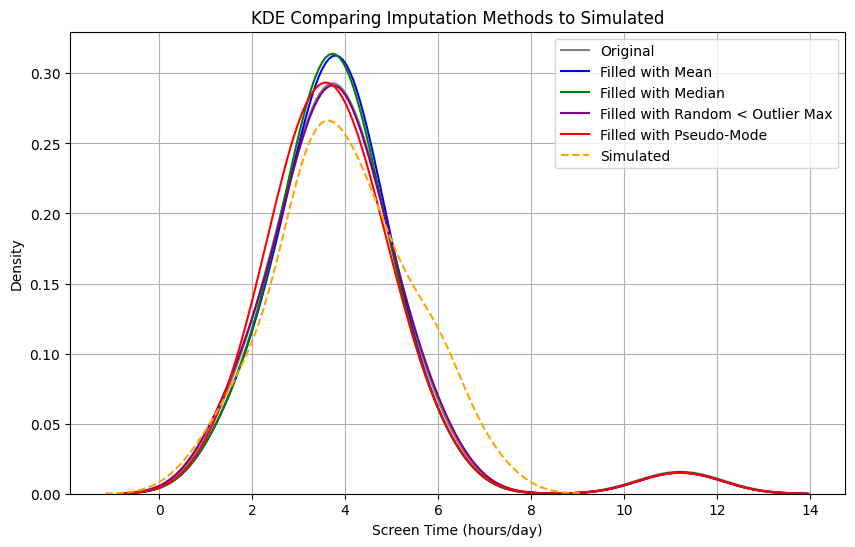

In [32]:
## Case 1 Problem D code and graph

from scipy.stats import ttest_ind

simulated = np.random.normal(3.85, 1.25, 60)

mean = mean_screen_time.dropna().astype(float)
median = median_screen_time.dropna().astype(float)
random = rand.dropna().astype(float)
pseudo = pseudo_mode_screen_time.dropna().astype(float)

_, p_mean = ttest_ind(mean, simulated)
_, p_median = ttest_ind(median, simulated)
_, p_random = ttest_ind(random, simulated)
_, p_pseudo = ttest_ind(pseudo, simulated)



print("P-values comparing to reference distribution:")
print(f"Filled with Mean: {p_mean:.3f}")
print(f"Filled with Median: {p_median:.3f}")
print(f"Filled with Random < Outlier Max: {p_random:.3f}")
print(f"Filled with Pseudo-Mode: {p_pseudo:.3f}")

plt.figure(figsize=(10, 6))
sns.kdeplot(no_na_screen_times.astype(float), label="Original", color="gray")
sns.kdeplot(mean, label="Filled with Mean", color="blue")
sns.kdeplot(median, label="Filled with Median", color="green")
sns.kdeplot(random, label="Filled with Random < Outlier Max", color="purple")
sns.kdeplot(pseudo, label="Filled with Pseudo-Mode", color="red")
sns.kdeplot(simulated, label="Simulated", color="orange", linestyle="--")

plt.title("KDE Comparing Imputation Methods to Simulated")
plt.xlabel("Screen Time (hours/day)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


#### Answer to Problem D:
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?

**Mean imputation is the closest to the simulated distribution (as it has the highest p-value). This is likely because both are normally distributed, and the mean best preserves the original data’s shape and center fairly well.**


### Case 2: Perceived average screen time

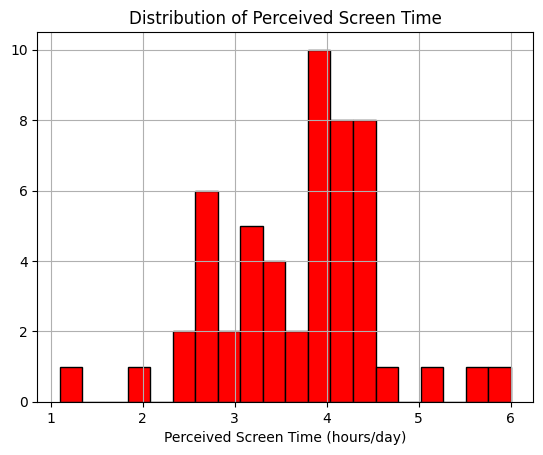

4     1.1
32    6.0
Name: perceived_average_screen_time, dtype: float64
-0.21439363473731404


In [33]:
## Case 2 Problem A code and histogram
import matplotlib.pyplot as plt
perceived_screen_time = individual_data['perceived_average_screen_time'].replace(-1, pd.NA).dropna().astype(float)
perceived_screen_time.hist(bins=20, color='red', edgecolor='black')
plt.xlabel("Perceived Screen Time (hours/day)")
plt.title("Distribution of Perceived Screen Time")
plt.show()

q1 = perceived_screen_time.quantile(0.25)
q3 = perceived_screen_time.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = perceived_screen_time[(perceived_screen_time < lower) | (perceived_screen_time > upper)]
print(outliers)

skewness = perceived_screen_time.skew()
print(skewness)

#### Writeup Answer to Problem B:
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness?

**There are two outliers (1.1 adn 6.0), and these are both well above average daily screen time.**

**It is left-skewed with a skewness of *-0.21*.**

In [34]:
## Case 2 Problem B code
screen_times = individual_data['actual_average_screen_time'].replace(-1.0, pd.NA).dropna().astype(float)
mean = screen_times.mean()
std = screen_times.std()
threshold = mean + std
intense = screen_times[screen_times >= threshold]
print(len(intense))

4


How many of them are intense phone users?

**There are 4 intense phone users by this metric**

In [35]:
## Case 2 Problem C code and graph
from scipy.stats import chi2_contingency

screen_times = individual_data['actual_average_screen_time'].replace(-1, pd.NA)
perceived_screen_times = individual_data['perceived_average_screen_time'].replace(-1, pd.NA)

no_na = screen_times.notna()
screen_times_no_na = screen_times[no_na]
perceived_screen_times_no_na = perceived_screen_times[no_na]

missing_perceived_screen_times = perceived_screen_times_no_na.isna()

threshold = screen_times_no_na.mean() + screen_times_no_na.std()
intense = screen_times_no_na > threshold

table = pd.crosstab(missing_perceived_screen_times, intense)

_, p, _, _ = chi2_contingency(table)
print(p)



0.11666446478102341


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR?

**The p-value is 0.1167. This means we cannot reject the null hypothesis, which suggests no significant correlation between missing perceived screen time and being an intense phone user. Therefore, the missingness is likely MAR.**

### Case 3: Location

In [36]:
## Case 3 Problem A code (graph)

users = []

for uuid, df in sensor_data.items():
    curr_battery = df['lf_measurements:battery_level']
    curr_latitude = df['location:raw_latitude']

    low_battery = curr_battery < 20
    missing_location_low_battery = curr_latitude.isna() & low_battery

    total_low_battery = low_battery.sum()
    lost_minutes = missing_location_low_battery.sum()

    if lost_minutes >= 5 and total_low_battery > 0:
        proportion = lost_minutes / total_low_battery

        if proportion >= 0.50:
            users.append((uuid, lost_minutes, total_low_battery, proportion))

for uuid, lost, total, prop in users:
    print(f"UUID: {uuid} | Lost: {lost} min | Out of: {total} min | Proportion: {prop:.2%}")
    print('---------------------------------------------------------------------------------------------------------')

UUID: 7D9BB102-A612-4E2A-8E22-3159752F55D8 | Lost: 1216 min | Out of: 1600 min | Proportion: 76.00%
---------------------------------------------------------------------------------------------------------
UUID: 0E6184E1-90C0-48EE-B25A-F1ECB7B9714E | Lost: 7425 min | Out of: 7511 min | Proportion: 98.86%
---------------------------------------------------------------------------------------------------------
UUID: 61359772-D8D8-480D-B623-7C636EAD0C81 | Lost: 6071 min | Out of: 6071 min | Proportion: 100.00%
---------------------------------------------------------------------------------------------------------
UUID: CDA3BBF7-6631-45E8-85BA-EEB416B32A3C | Lost: 2860 min | Out of: 2860 min | Proportion: 100.00%
---------------------------------------------------------------------------------------------------------
UUID: 4E98F91F-4654-42EF-B908-A3389443F2E7 | Lost: 3240 min | Out of: 3244 min | Proportion: 99.88%
--------------------------------------------------------------------------

explanation of implementation:

**I identified users who consistently lost location data when their battery was below 20% by checking if over 50% of their low-battery minutes (requiring at least 5 minutes of low battery) had missing latitude values. The output above shows the number of minutes (and proportion) missing per user who exhibited behavior 2**

156
0       32.882301
1       32.882297
2       32.882288
3       32.882315
4       32.882304
5       32.882306
6       32.882290
7       32.882293
8       32.882308
9       32.882290
10      32.882290
11      32.882296
12      32.882304
13      32.882300
14      32.882286
15      32.882292
16      32.882296
17      32.882285
18      32.882303
19      32.882292
20      32.882295
21      32.882300
22      32.882294
23      32.882297
24      32.882291
25      32.882297
26      32.882304
27      32.882297
28      32.882288
29      32.882285
30      32.882308
31      32.882306
32      32.882310
33            NaN
34      32.882246
35      32.882172
36            NaN
37            NaN
38            NaN
39            NaN
40      32.877556
41      32.877603
42            NaN
43            NaN
44            NaN
45      32.877615
46      32.877604
47            NaN
48            NaN
49            NaN
50            NaN
51            NaN
52            NaN
53            NaN
54            NaN
55    

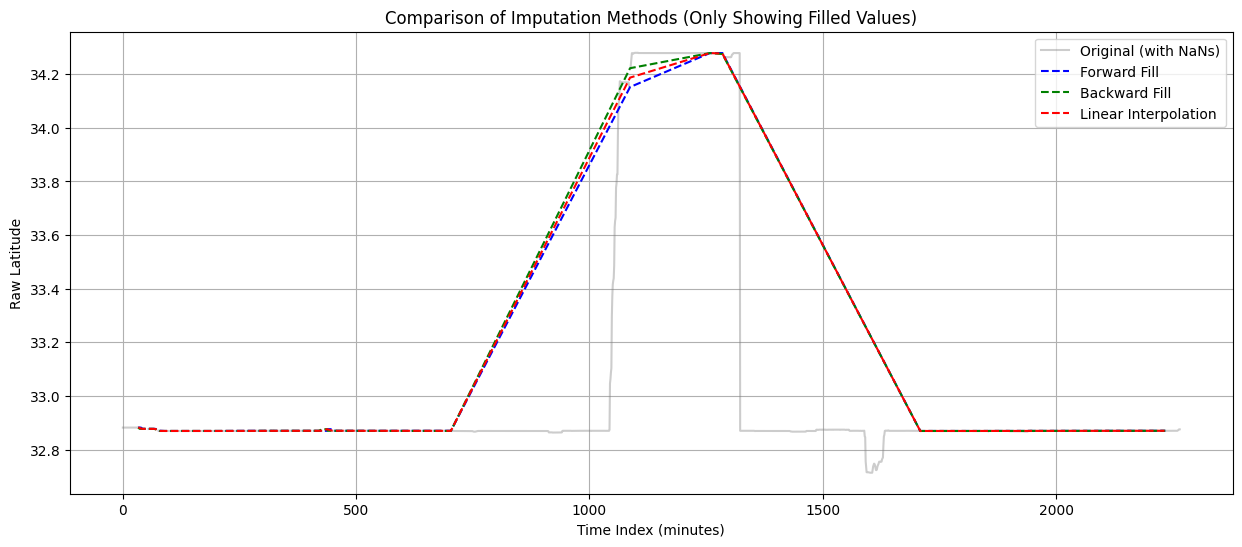

In [37]:
## Case 3 Problem B code and graph
user_id = 'F50235E0-DD67-4F2A-B00B-1F31ADA998B9'
df = sensor_data[user_id]
latitude = df['location:raw_latitude']

print(latitude.isna().sum())

with pd.option_context('display.max_rows', None):
    print(latitude)


missing_idx = latitude[latitude.isna()].index
print(f"Missing latitude count: {len(missing_idx)}")

forward_filled = latitude.ffill()
backward_filled = latitude.bfill()
interpolated = latitude.interpolate()

plt.figure(figsize=(15, 6))
plt.plot(latitude.index, latitude, label='Original (with NaNs)', color='gray', alpha=0.4)

plt.plot(missing_idx, forward_filled.loc[missing_idx], label='Forward Fill', linestyle='--', color='blue')
plt.plot(missing_idx, backward_filled.loc[missing_idx], label='Backward Fill', linestyle='--', color='green')
plt.plot(missing_idx, interpolated.loc[missing_idx], label='Linear Interpolation', linestyle='--', color='red')

plt.title('Comparison of Imputation Methods (Only Showing Filled Values)')
plt.xlabel('Time Index (minutes)')
plt.ylabel('Raw Latitude')
plt.legend()
plt.grid(True)
plt.show()


Missing latitude count: 156


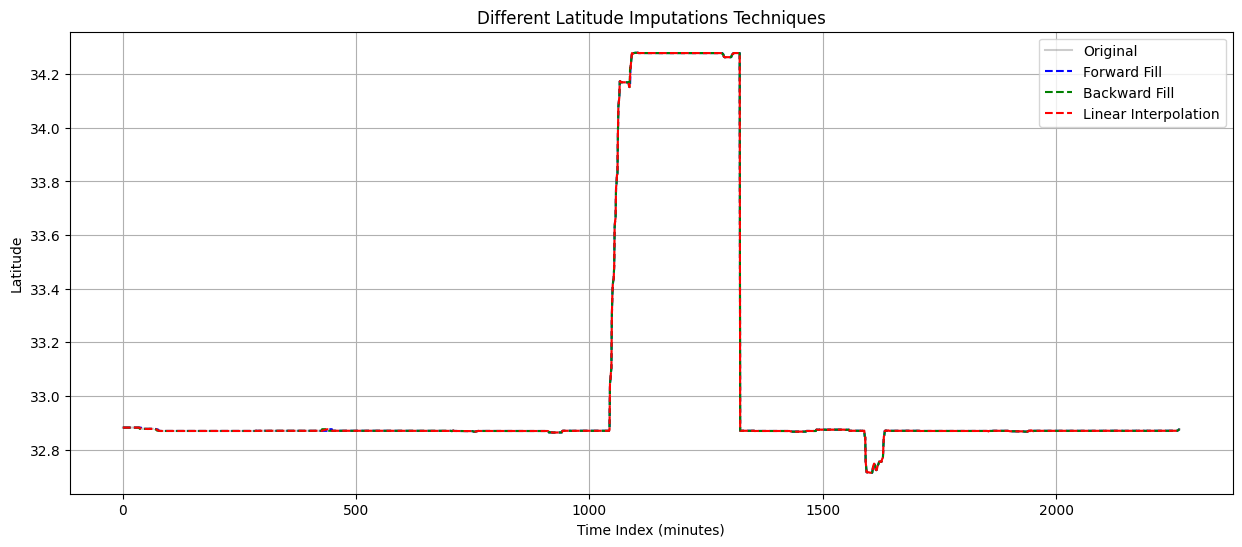

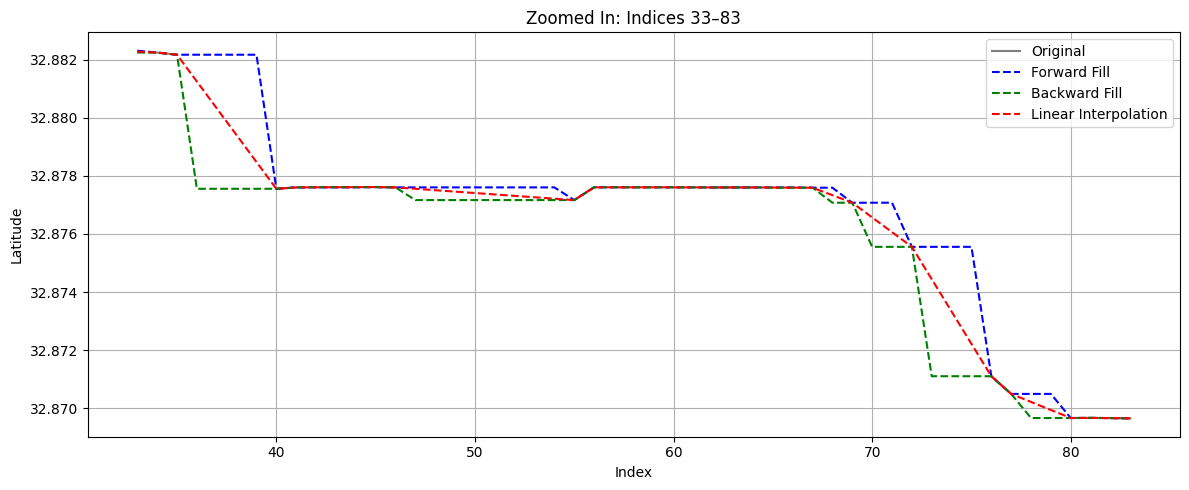

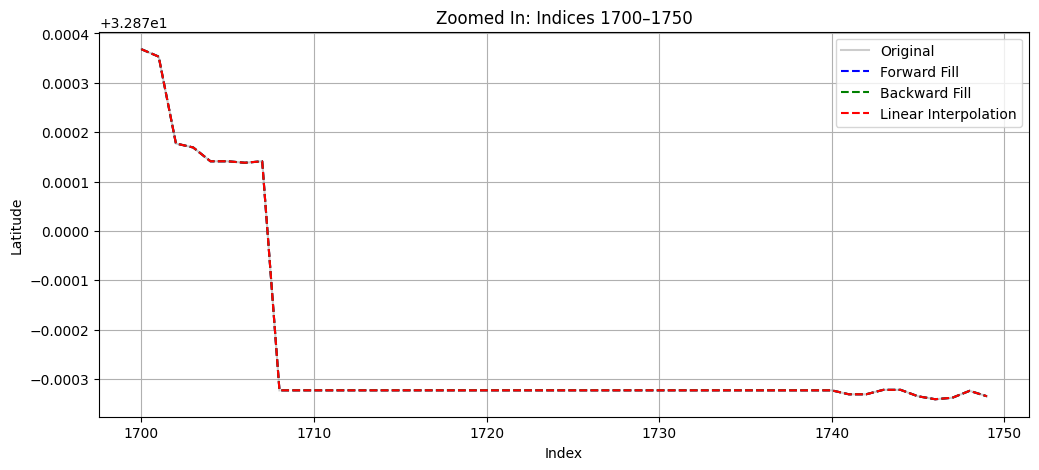

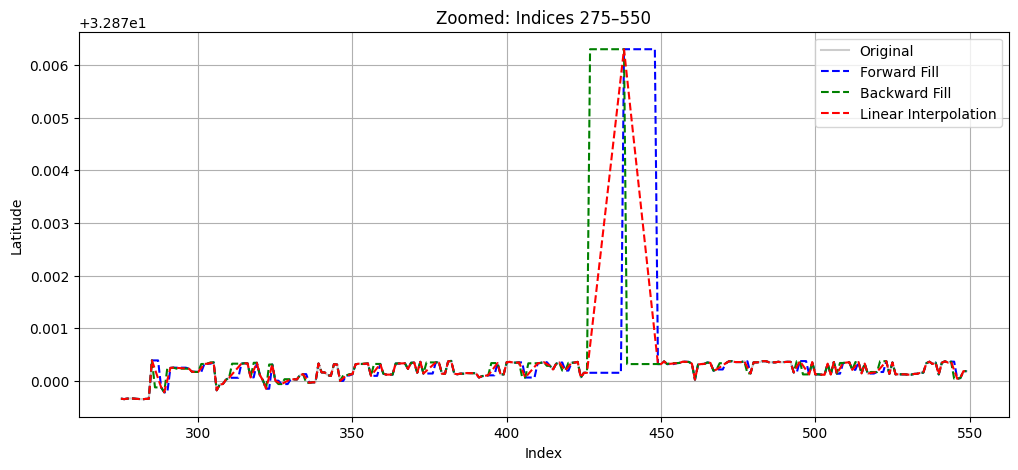

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

user_id = 'F50235E0-DD67-4F2A-B00B-1F31ADA998B9'
df = sensor_data[user_id]
latitude = df['location:raw_latitude']

print("Missing latitude count:", latitude.isna().sum())

forward_filled = latitude.ffill()
backward_filled = latitude.bfill()
interpolated = latitude.interpolate()


plt.figure(figsize=(15, 6))
plt.plot(latitude.index, latitude, label='Original', color='gray', alpha=0.4)
plt.plot(latitude.index, forward_filled, label='Forward Fill', linestyle='--', color='blue')
plt.plot(latitude.index, backward_filled, label='Backward Fill', linestyle='--', color='green')
plt.plot(latitude.index, interpolated, label='Linear Interpolation', linestyle='--', color='red')
plt.title('Different Latitude Imputations Techniques')
plt.xlabel('Time Index (minutes)')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


start_idx, end_idx = 33, 83
x = latitude.index[start_idx:end_idx+1]

plt.figure(figsize=(12, 5))
plt.plot(x, latitude[start_idx:end_idx+1], label="Original", color="gray")
plt.plot(x, forward_filled[start_idx:end_idx+1], label="Forward Fill", linestyle="--", color="blue")
plt.plot(x, backward_filled[start_idx:end_idx+1], label="Backward Fill", linestyle="--", color="green")
plt.plot(x, interpolated[start_idx:end_idx+1], label="Linear Interpolation", linestyle="--", color="red")
plt.title(f"Zoomed In: Indices {start_idx}–{end_idx}")
plt.xlabel("Index")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

start1, end1 = 1700, 1750
plt.figure(figsize=(12, 5))
plt.plot(latitude.index[start1:end1], latitude[start1:end1], label='Original', color='gray', alpha=0.4)
plt.plot(latitude.index[start1:end1], forward_filled[start1:end1], label='Forward Fill', linestyle='--', color='blue')
plt.plot(latitude.index[start1:end1], backward_filled[start1:end1], label='Backward Fill', linestyle='--', color='green')
plt.plot(latitude.index[start1:end1], interpolated[start1:end1], label='Linear Interpolation', linestyle='--', color='red')
plt.title(f'Zoomed In: Indices {start1}–{end1}')
plt.xlabel('Index')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

start2, end2 = 275, 550
plt.figure(figsize=(12, 5))
plt.plot(latitude.index[start2:end2], latitude[start2:end2], label='Original', color='gray', alpha=0.4)
plt.plot(latitude.index[start2:end2], forward_filled[start2:end2], label='Forward Fill', linestyle='--', color='blue')
plt.plot(latitude.index[start2:end2], backward_filled[start2:end2], label='Backward Fill', linestyle='--', color='green')
plt.plot(latitude.index[start2:end2], interpolated[start2:end2], label='Linear Interpolation', linestyle='--', color='red')
plt.title(f'Zoomed: Indices {start2}–{end2}')
plt.xlabel('Index')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose?


**Linear Interpolation seems to have the closest to a realistic representation of missing data, and this is especially seen from indices 33-88. Forward and Backward fills generally create more rigid interpolations that are abrupt and not as natural, especially in the context of latitude, which would in theory not change drastically from one point in time to the other. Due to this, I would opt to use linear inperpolation for further analysis on this dataset.**